In [1]:

import warnings
warnings.filterwarnings("ignore")


            timestamp      PEPE      AVAX       BTC      DOGE       WIF  \
0 2024-05-16 12:00:00  1.000000  1.000000  1.000000  1.000000  1.000000   
1 2024-05-16 12:05:00  1.004822  0.997967  0.998725  0.998644  0.987439   
2 2024-05-16 12:10:00  1.002893  0.997386  0.998914  0.997998  0.990418   
3 2024-05-16 12:15:00  1.001929  0.997386  0.999880  0.999354  0.989640   
4 2024-05-16 12:20:00  1.005786  0.995062  0.998214  0.995221  0.987371   

       BONK       ADA       SUI      SHIB       XLM       XRP       TRX  \
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  0.997235  0.998678  0.994973  0.999603  0.999061  0.997684  1.000080   
2  0.995656  0.998457  0.996616  1.000397  0.999061  0.997684  1.000562   
3  0.990916  1.000220  1.002514  1.003172  1.000000  0.997877  1.000963   
4  0.986177  0.998237  0.999227  0.997621  0.999061  0.997298  1.000562   

        SOL      LINK       NOT      AAVE       ETH  
0  1.000000  1.000000  1.000000  1.000000  1

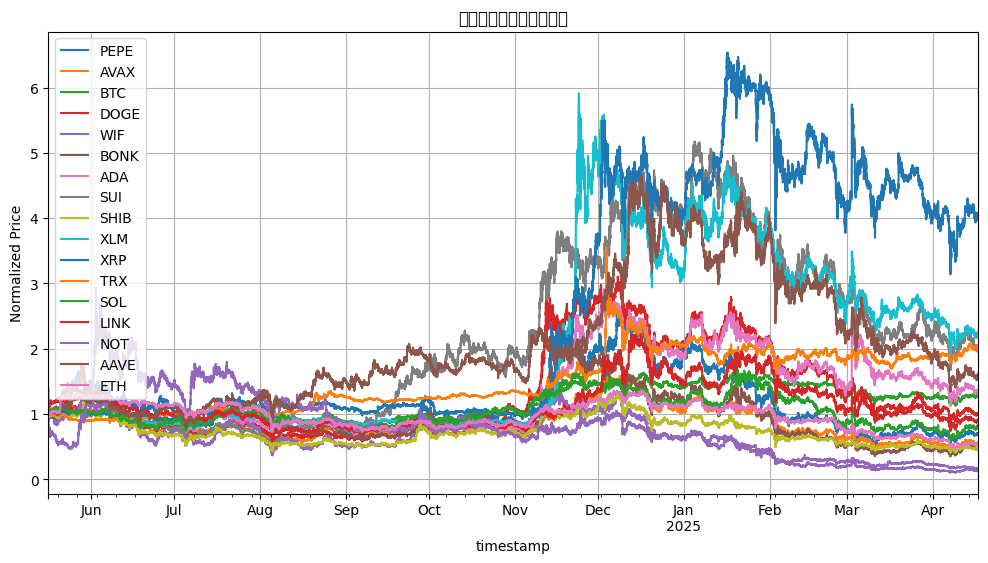

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 文件夹路径
DATA_DIR = "/Users/lizeyu/Downloads/data_bn_24"

# 提取币种名的函数
def get_symbol(filename):
    return filename.replace("_klines_5m.csv", "")

# 读取单个币种数据
def load_symbol_data(file):
    symbol = get_symbol(file)
    path = os.path.join(DATA_DIR, file)
    df = pd.read_csv(path, header=None)

    if df.shape[0]>55555:
        if df.shape[1] != 12 or df.empty:
            print(f"⚠️ 跳过 {file}（列数 ≠ 12 或为空）")
            return None
        df.columns = [
            "timestamp", "open", "high", "low", "close", "volume",
            "close_time", "quote_asset_volume", "number_of_trades",
            "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
        ]
        return df[["timestamp", "close"]].rename(columns={"close": symbol})
    

# 批量读取并合并
files = [f for f in os.listdir(DATA_DIR) if f.endswith("_klines_5m.csv")]
dataframes = [load_symbol_data(f) for f in files]
dataframes = [df for df in dataframes if df is not None]

# 合并所有币种的数据（按 timestamp）
if dataframes:
    df_all = dataframes[0]
    for df in dataframes[1:]:
        df_all = df_all.merge(df, on="timestamp", how="inner")
    
    # 时间戳转为时间（Binance 用的是毫秒）
    df_all["timestamp"] = pd.to_datetime(df_all["timestamp"], unit="ms")
    df_all = df_all.sort_values("timestamp").reset_index(drop=True)

    # 归一化每列
    symbols = [get_symbol(f) for f in files if get_symbol(f) in df_all.columns]
    for sym in symbols:
        df_all[sym] = df_all[sym] / df_all[sym].iloc[0]

    # 输出前几行
    print(df_all.head())

    # 可选：画图可视化
    df_all.set_index("timestamp")[symbols].plot(figsize=(12, 6), title="归一化后的币种价格走势")
    plt.ylabel("Normalized Price")
    plt.grid(True)
    plt.show()
else:
    print("🚫 没有成功加载任何币种数据")


In [3]:
df_all

,timestamp,PEPE,AVAX,BTC,DOGE,WIF,BONK,ADA,SUI,SHIB,XLM,XRP,TRX,SOL,LINK,NOT,AAVE,ETH
0,2024-05-16 12:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2024-05-16 12:05:00,1.004822,0.997967,0.998725,0.998644,0.987439,0.997235,0.998678,0.994973,0.999603,0.999061,0.997684,1.000080,0.997726,0.998987,0.957014,0.999534,0.997937
2,2024-05-16 12:10:00,1.002893,0.997386,0.998914,0.997998,0.990418,0.995656,0.998457,0.996616,1.000397,0.999061,0.997684,1.000562,0.998217,0.999493,1.116820,0.999767,0.997524
3,2024-05-16 12:15:00,1.001929,0.997386,0.999880,0.999354,0.989640,0.990916,1.000220,1.002514,1.003172,1.000000,0.997877,1.000963,0.999078,0.999855,1.117022,0.999651,0.998404
4,2024-05-16 12:20:00,1.005786,0.995062,0.998214,0.995221,0.987371,0.986177,0.998237,0.999227,0.997621,0.999061,0.997298,1.000562,0.996742,0.995514,1.131992,0.995808,0.996841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96704,2025-04-17 06:40:00,0.706847,0.562881,1.278126,1.016273,0.127979,0.480253,1.370648,2.040023,0.476209,2.248826,4.060208,1.973029,0.826357,0.915340,0.169718,1.617955,0.534260
96705,2025-04-17 06:45:00,0.705882,0.562300,1.278456,1.014917,0.127641,0.478673,1.369546,2.039637,0.475813,2.249765,4.054226,1.972227,0.826849,0.912446,0.169516,1.613531,0.533807
96706,2025-04-17 06:50:00,0.705882,0.562300,1.278120,1.014852,0.127979,0.481043,1.371309,2.037896,0.475416,2.243192,4.053454,1.973029,0.828201,0.913893,0.169819,1.616791,0.533784
96707,2025-04-17 06:55:00,0.707811,0.562010,1.278405,1.014077,0.127979,0.481438,1.370207,2.037123,0.475813,2.243192,4.049209,1.972227,0.826664,0.913169,0.169819,1.618654,0.533911


In [4]:
n = len(df_all)
p1 = int(n * 1/2)
p2 = int(n * 3/4)

df_head = df_all.iloc[:p1].reset_index(drop=True)     # 前
df_mid  = df_all.iloc[p1:p2].reset_index(drop=True)   # 中
df_tail = df_all.iloc[p2:].reset_index(drop=True)     # 后


In [5]:
df_all = df_head

In [6]:
df_head

,timestamp,PEPE,AVAX,BTC,DOGE,WIF,BONK,ADA,SUI,SHIB,XLM,XRP,TRX,SOL,LINK,NOT,AAVE,ETH
0,2024-05-16 12:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2024-05-16 12:05:00,1.004822,0.997967,0.998725,0.998644,0.987439,0.997235,0.998678,0.994973,0.999603,0.999061,0.997684,1.000080,0.997726,0.998987,0.957014,0.999534,0.997937
2,2024-05-16 12:10:00,1.002893,0.997386,0.998914,0.997998,0.990418,0.995656,0.998457,0.996616,1.000397,0.999061,0.997684,1.000562,0.998217,0.999493,1.116820,0.999767,0.997524
3,2024-05-16 12:15:00,1.001929,0.997386,0.999880,0.999354,0.989640,0.990916,1.000220,1.002514,1.003172,1.000000,0.997877,1.000963,0.999078,0.999855,1.117022,0.999651,0.998404
4,2024-05-16 12:20:00,1.005786,0.995062,0.998214,0.995221,0.987371,0.986177,0.998237,0.999227,0.997621,0.999061,0.997298,1.000562,0.996742,0.995514,1.131992,0.995808,0.996841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48349,2024-10-31 09:05:00,0.915140,0.750799,1.090903,1.099509,0.868770,0.827804,0.782724,1.971384,0.733148,0.877934,1.000965,1.359769,1.073883,0.876990,0.686255,1.770028,0.880098
48350,2024-10-31 09:10:00,0.916104,0.750799,1.090602,1.099832,0.869109,0.827804,0.782724,1.974671,0.732355,0.876995,1.000772,1.361374,1.073883,0.876990,0.686558,1.768747,0.880581
48351,2024-10-31 09:15:00,0.914176,0.750508,1.090662,1.100349,0.867077,0.827014,0.782503,1.976991,0.731959,0.876056,1.001158,1.361374,1.072715,0.876266,0.685344,1.769213,0.880338
48352,2024-10-31 09:20:00,0.915140,0.750218,1.090103,1.102803,0.867755,0.826619,0.782944,1.970224,0.732752,0.876056,1.000772,1.361374,1.073084,0.875543,0.684738,1.768048,0.880004


In [7]:

# 参数设置

window = 50    # 回归窗口长度
past = 288    # 回溯多少步来做回归（即用 t-past-window 到 t-past 的数据）

thres = 2    # 偏离sigma倍数
hold_time = 30   # 持有时间
window_corr = past * 3
zs = -0.03


fee = 0    # 手续费

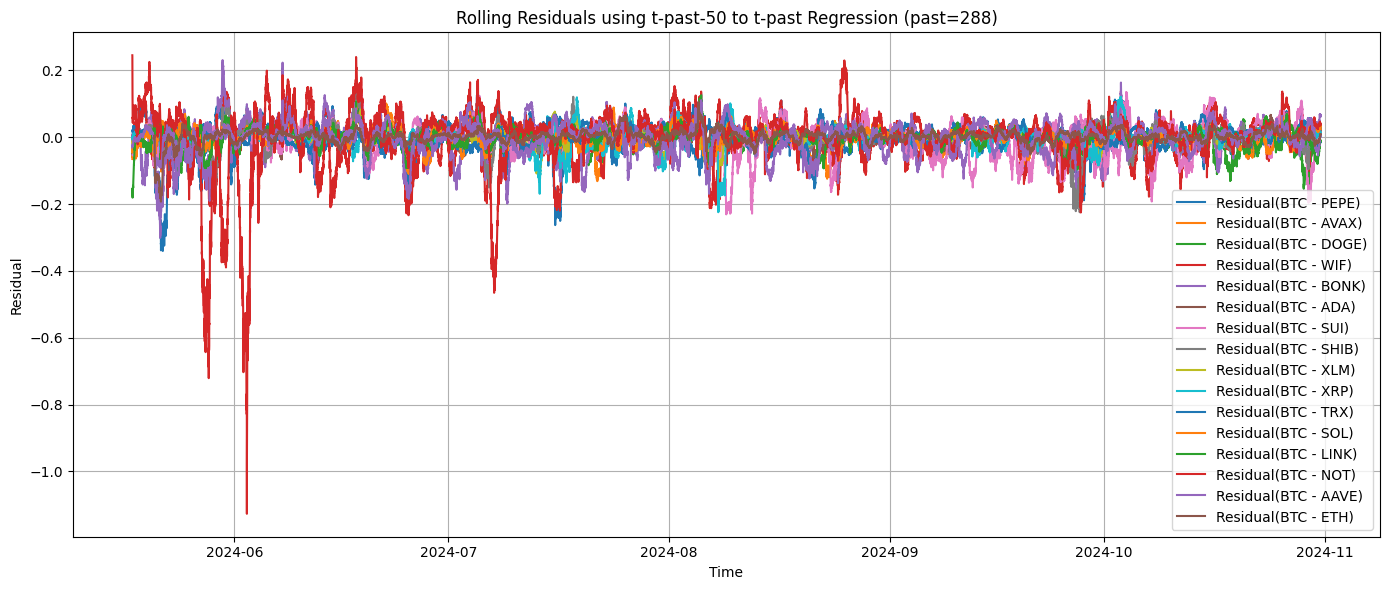

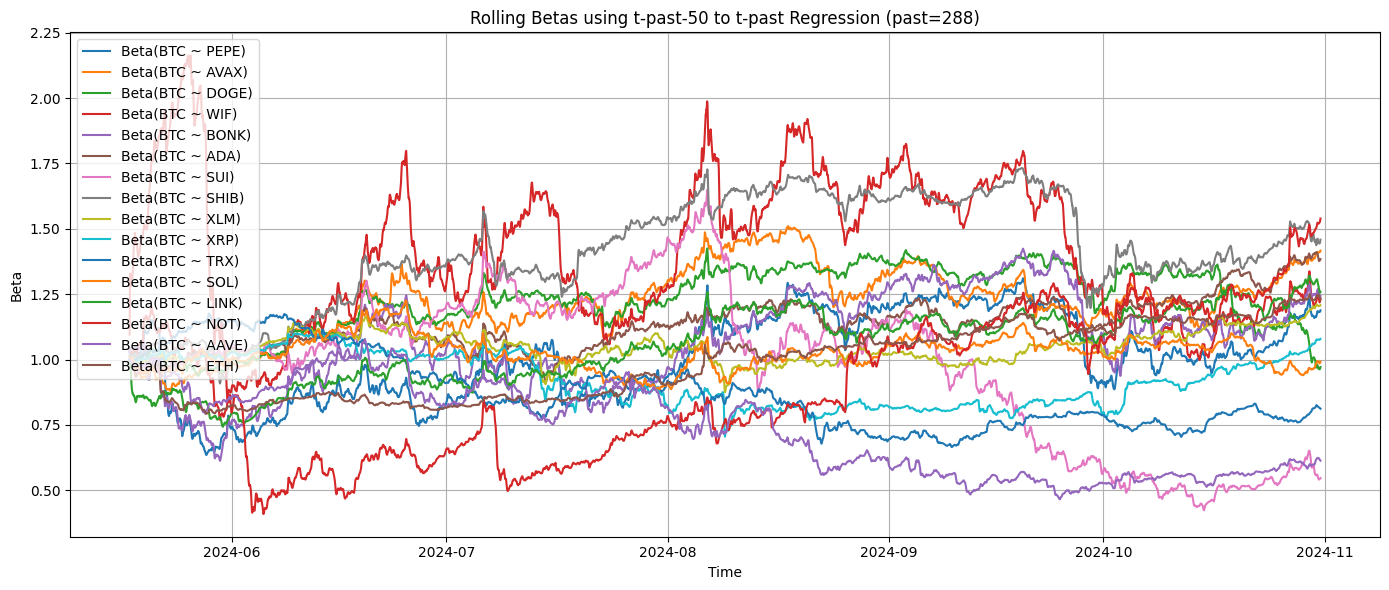

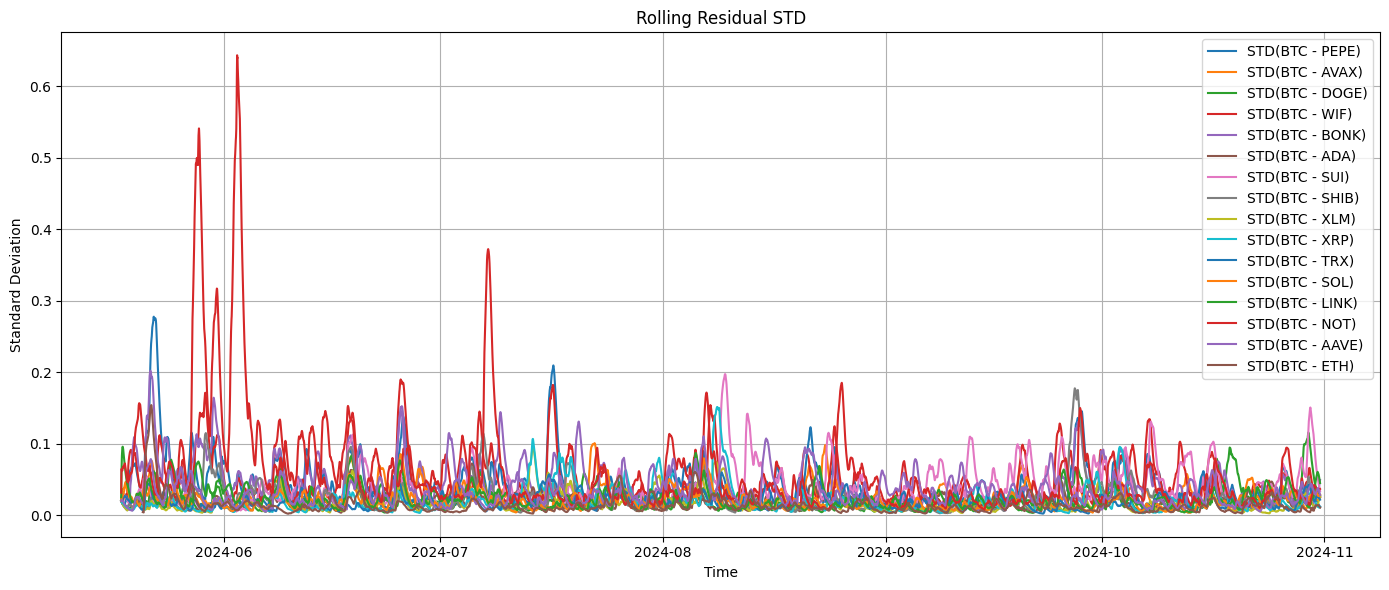

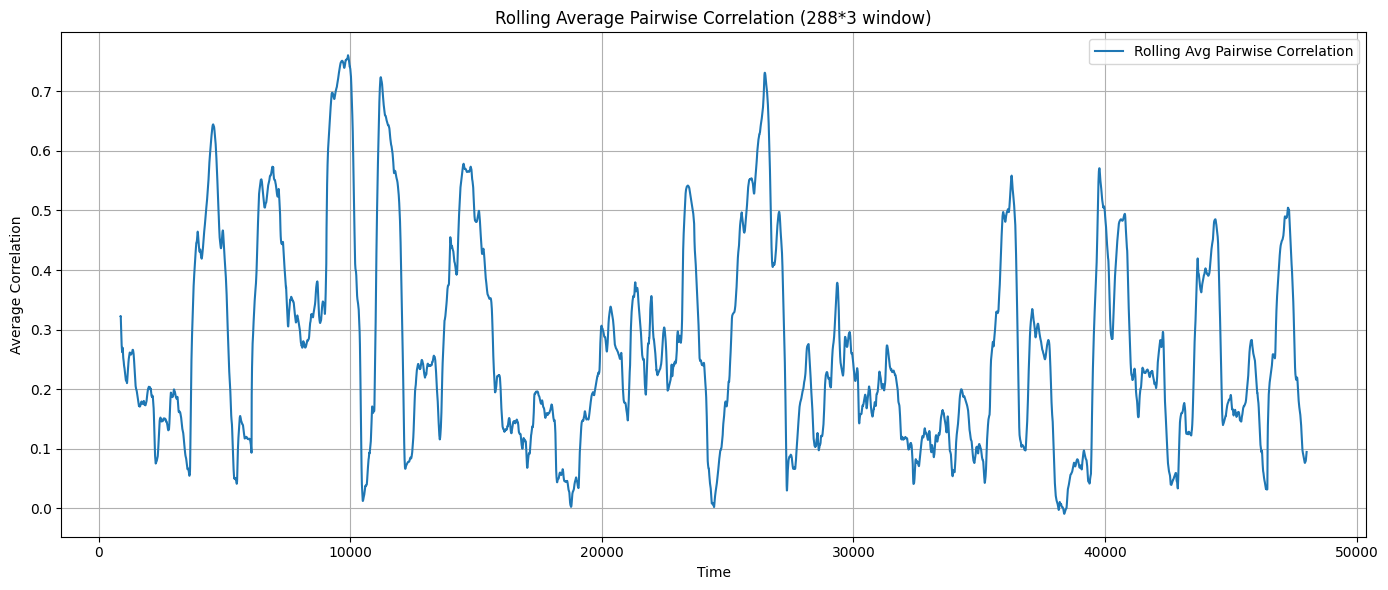

In [8]:
if 'BTC' in symbols:
    symbols.remove('BTC')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_all = df_all.sort_values('timestamp').reset_index(drop=True)

residuals_dict = {}
betas_dict = {}
std_dict = {}
corr_aves_dict = {}


# 新增部分：残差之间的滚动相关性
corr_aves = []
corr_timestamps = []

corr_aves_df = pd.Series(corr_aves, index=corr_timestamps, name="avg_correlation")

for sym in symbols:
    std_temp = 0.02
    residuals = []
    betas = []
    stds = []
    timestamps = []

    for t in range(past + window, len(df_all)):
        x_window = df_all.loc[t - past - window: t - past - 1, sym].values.reshape(-1, 1)
        y_window = df_all.loc[t - past - window: t - past - 1, 'BTC'].values.reshape(-1, 1)

        if np.any(np.isnan(x_window)) or np.any(np.isnan(y_window)):
            residuals.append(np.nan)
            timestamps.append(df_all.loc[t, 'timestamp'])
            continue

        reg = LinearRegression(fit_intercept=False).fit(x_window, y_window)
        beta = reg.coef_[0]
        x_t = df_all.loc[t, sym]
        y_t = df_all.loc[t, 'BTC']
        pred = beta * x_t
        residual = y_t - pred

        std_temp = np.sqrt(std_temp**2 * 0.99 + residual**2 * 0.01)

        residuals.append(residual)
        betas.append(beta)
        stds.append(std_temp)
        timestamps.append(df_all.loc[t, 'timestamp'])

    residuals_dict[sym] = pd.Series(residuals, index=timestamps)
    betas_dict[sym] = pd.Series(betas, index=timestamps)
    std_dict[sym] = pd.Series(stds, index=timestamps)
df_resid = pd.DataFrame(residuals_dict)


for t in range(window_corr, len(df_resid)):
    df_resid_temp = df_resid.iloc[t - window_corr: t]

    # 防止 list 元素的情况
    df_float = df_resid_temp.apply(lambda col: col.map(lambda x: x[0] if isinstance(x, list) else x))

    corr_matrix = df_float.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    corr_ave = upper_triangle.stack().mean()

    corr_aves.append(corr_ave)
    corr_timestamps.append(df_all.index[t])

for sym in symbols:
    corr_aves_dict[sym] = pd.Series(corr_aves, index=timestamps[-len(corr_aves):])
    
corr_aves_df = pd.Series(corr_aves, index=corr_timestamps, name="avg_correlation")
valid_len = len(corr_aves)  # 统一以 corr_aves 的长度为准
valid_index = timestamps[-valid_len:]  # 统一用 timestamps 后段
residuals_dict[sym] = pd.Series(residuals[-valid_len:], index=valid_index)
betas_dict[sym] = pd.Series(betas[-valid_len:], index=valid_index)
std_dict[sym] = pd.Series(stds[-valid_len:], index=valid_index)
corr_aves_dict[sym] = pd.Series(corr_aves, index=valid_index)
# === 保留结构不变，同时加入平均相关性计算 ===
df_resid = pd.DataFrame(residuals_dict)
df_resid.index.name = 'timestamp'

df_std = pd.DataFrame(std_dict)
df_std.index.name = 'timestamp'

df_beta = pd.DataFrame(betas_dict)
df_beta.index.name = 'timestamp'



# === 保留原始结构下的所有画图逻辑 ===
plt.figure(figsize=(14, 6))
for sym in symbols:
    plt.plot(df_resid.index, df_resid[sym], label=f"Residual(BTC - {sym})")
plt.legend()
plt.grid(True)
plt.title(f"Rolling Residuals using t-past-{window} to t-past Regression (past={past})")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
for sym in symbols:
    plt.plot(df_beta.index, df_beta[sym], label=f"Beta(BTC ~ {sym})")
plt.legend()
plt.grid(True)
plt.title(f"Rolling Betas using t-past-{window} to t-past Regression (past={past})")
plt.xlabel("Time")
plt.ylabel("Beta")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
for sym in symbols:
    plt.plot(df_std.index, df_std[sym], label=f"STD(BTC - {sym})")
plt.legend()
plt.grid(True)
plt.title(f"Rolling Residual STD")
plt.xlabel("Time")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.show()

# 新增画图：残差之间的滚动平均相关性
plt.figure(figsize=(14, 6))
plt.plot(corr_aves_df.index, corr_aves_df.values, label="Rolling Avg Pairwise Correlation")
plt.legend()
plt.grid(True)
plt.title("Rolling Average Pairwise Correlation (288*3 window)")
plt.xlabel("Time")
plt.ylabel("Average Correlation")
plt.tight_layout()
plt.show()


In [9]:
df_all.shape

(48354, 18)

In [10]:
corr_aves_df.shape

(47152,)

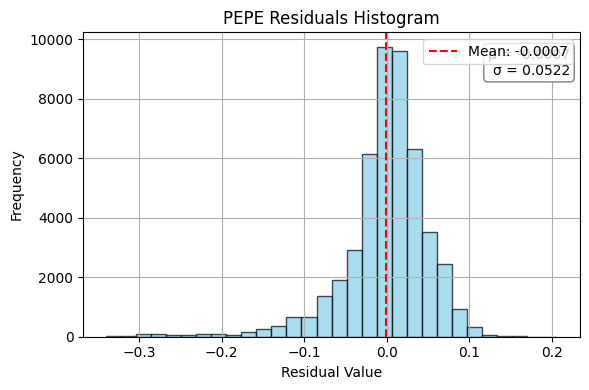

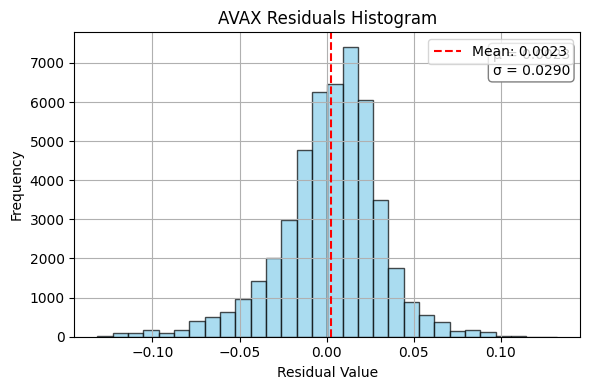

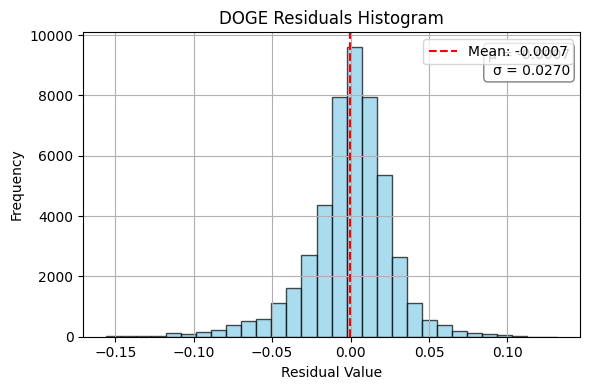

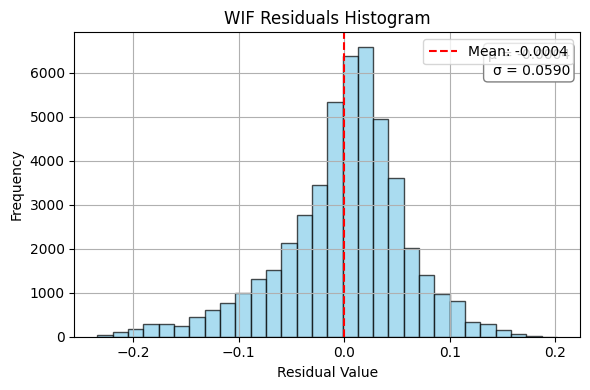

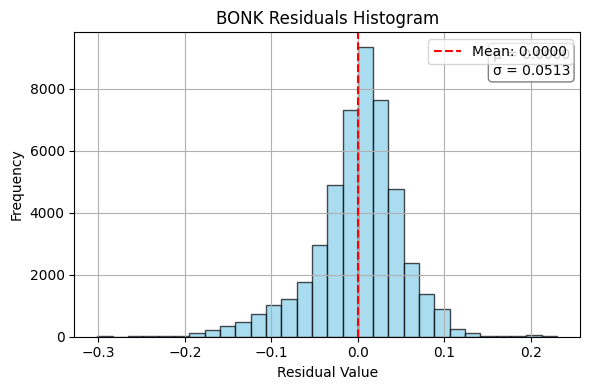

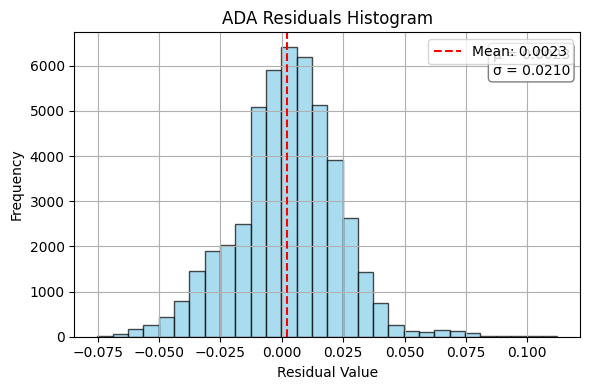

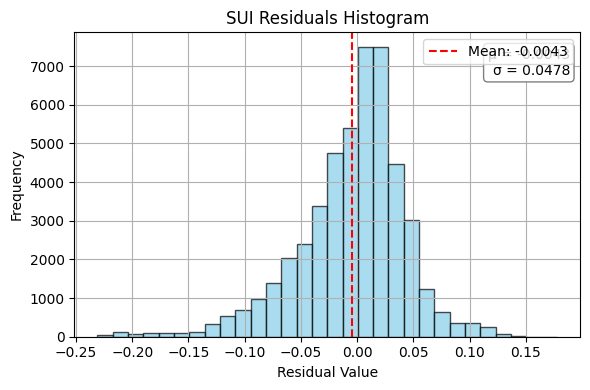

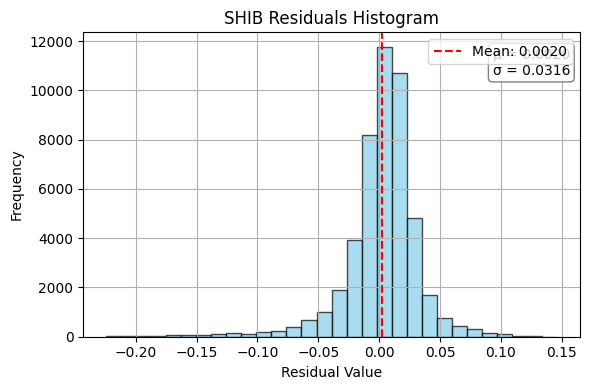

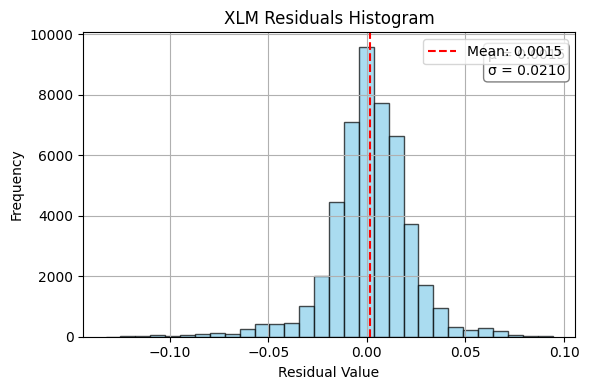

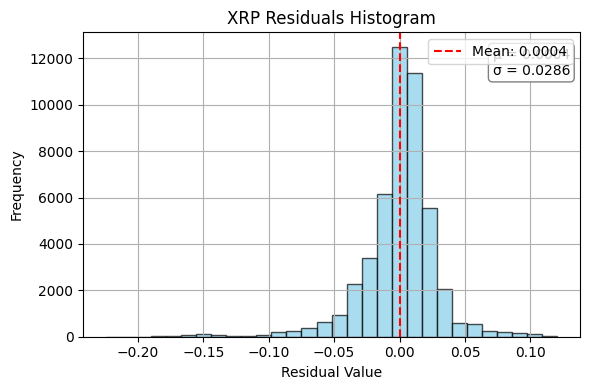

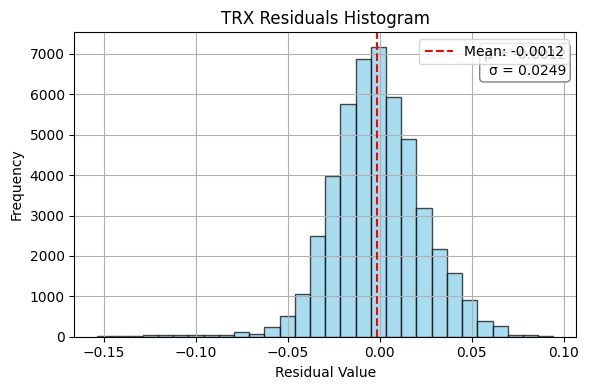

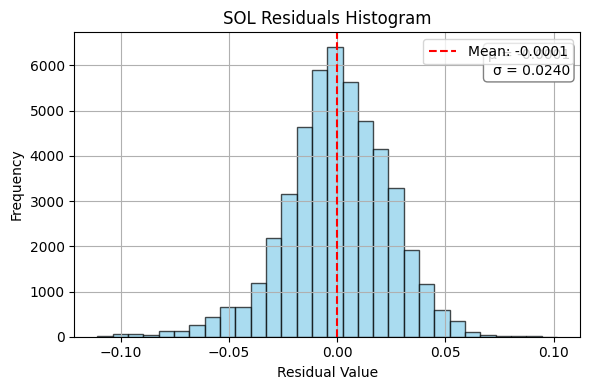

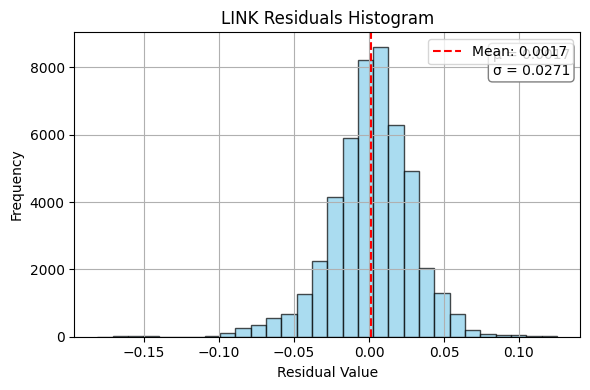

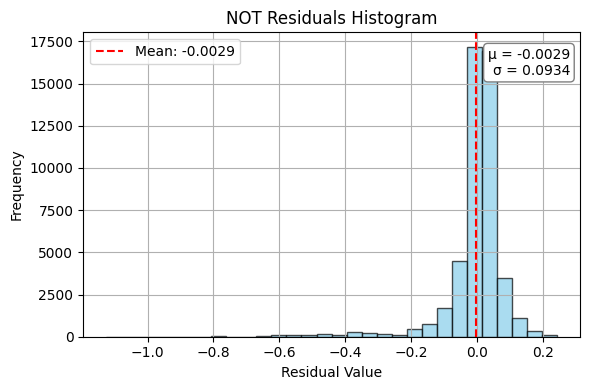

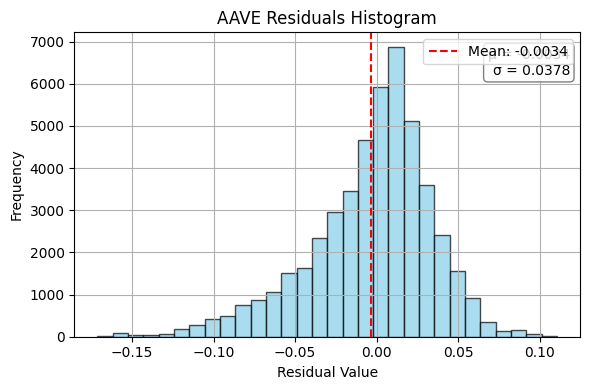

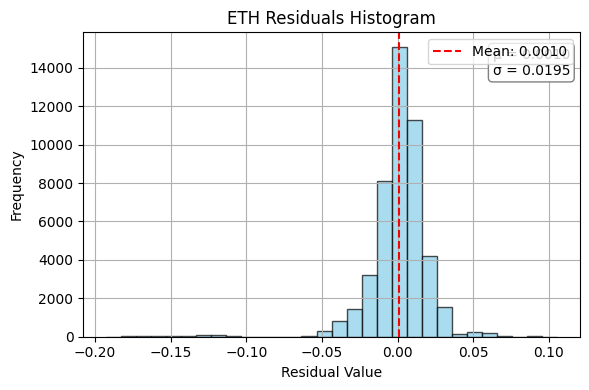

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# 每个币种残差分布
for symbol, series in residuals_dict.items():
    # 提取 float 值
    values = series.apply(lambda x: x[0])
    
    # 计算均值与标准差
    mean_val = values.mean()
    std_val = values.std()

    # 绘图
    plt.figure(figsize=(6, 4))
    plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    
    # 均值线
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f"Mean: {mean_val:.4f}")
    
    # 标题和标签
    plt.title(f"{symbol} Residuals Histogram")
    plt.xlabel("Residual Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    
    # 显示均值和标准差
    plt.text(0.98, 0.95, f"μ = {mean_val:.4f}\nσ = {std_val:.4f}", 
             ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

    plt.tight_layout()
    plt.show()


In [12]:
residuals_dict

{'PEPE': 2024-05-17 16:10:00    [-0.0019928133336541975]
 2024-05-17 16:15:00     [-0.008297834227025236]
 2024-05-17 16:20:00     [-0.008943855415052493]
 2024-05-17 16:25:00      [-0.00663422412396808]
 2024-05-17 16:30:00     [-0.001771468600341608]
                                  ...           
 2024-10-31 09:05:00      [0.004719001362212483]
 2024-10-31 09:10:00      [0.002959132985826285]
 2024-10-31 09:15:00      [0.005027135154155982]
 2024-10-31 09:20:00      [0.002897984382669083]
 2024-10-31 09:25:00     [0.0025982644866122673]
 Length: 48016, dtype: object,
 'AVAX': 2024-05-17 16:10:00     [-0.06517940095163133]
 2024-05-17 16:15:00     [-0.06507365579601654]
 2024-05-17 16:20:00     [-0.06491294169246076]
 2024-05-17 16:25:00      [-0.0644771323363329]
 2024-05-17 16:30:00    [-0.061895881071258874]
                                 ...           
 2024-10-31 09:05:00     [0.028483072057696734]
 2024-10-31 09:10:00      [0.02789314736302506]
 2024-10-31 09:15:00     [0.02

In [13]:
residuals_positive_dict = {}
residuals_positive_count = {}
from datetime import timedelta


for coin, series in residuals_dict.items():

    values = series.apply(lambda x: x[0])

    start_time = series.index[0]
    
    freeze = False
    freeze_time = 0

    # 遍历每个时间戳，替换为实时的std
    filtered = []
    for timestamp, row in series.items():
        residual = row[0]
        # 从 std_dict 中取出该 coin 对应 timestamp 的 std 值
        std_at_time = std_dict[coin].get(timestamp, None)
        corr_ave_at_time = corr_aves_dict[coin].get(timestamp, None)
        
        if std_at_time is None or corr_ave_at_time is None:
            continue  # 如果该时间戳没有 std，就跳过
            
        if corr_ave_at_time > 0.5:
            freeze = True
            freeze_time = 0
        if freeze:
            freeze_time += 1
        if freeze_time > 288:
            freeze = False
            
        # 判断是否满足阈值条件
        if abs(residual) > thres * std_at_time and std_at_time < 0.1:
            if (timestamp - start_time) >= timedelta(days=1): 
                if freeze is False:
                    filtered.append((timestamp, residual))

    # 保存结果
    if filtered:
        residuals_positive_dict[coin] = filtered
        residuals_positive_count[coin] = len(filtered)


In [14]:
residuals_positive_dict

{'PEPE': [(Timestamp('2024-05-20 19:30:00'), -0.06349227657024303),
  (Timestamp('2024-05-20 19:35:00'), -0.06251624808084455),
  (Timestamp('2024-05-20 19:40:00'), -0.0634067744887401),
  (Timestamp('2024-05-20 19:45:00'), -0.09171114904556199),
  (Timestamp('2024-05-20 19:50:00'), -0.08864098770739126),
  (Timestamp('2024-05-20 19:55:00'), -0.10237221336354696),
  (Timestamp('2024-05-20 20:00:00'), -0.11703731389368377),
  (Timestamp('2024-05-20 20:05:00'), -0.09816762976252136),
  (Timestamp('2024-05-20 20:10:00'), -0.09606992159865158),
  (Timestamp('2024-05-20 20:15:00'), -0.0936915311692601),
  (Timestamp('2024-05-20 20:20:00'), -0.10104483830666267),
  (Timestamp('2024-05-20 20:25:00'), -0.11466831549509782),
  (Timestamp('2024-05-20 20:30:00'), -0.1208752424904207),
  (Timestamp('2024-05-20 20:35:00'), -0.1273753618456157),
  (Timestamp('2024-05-20 20:40:00'), -0.1345873377246185),
  (Timestamp('2024-05-20 20:45:00'), -0.13099130306189632),
  (Timestamp('2024-05-20 20:50:00'), 

In [15]:
residuals_positive_count

{'PEPE': 707,
 'AVAX': 499,
 'DOGE': 775,
 'WIF': 761,
 'BONK': 610,
 'ADA': 665,
 'SUI': 663,
 'SHIB': 613,
 'XLM': 746,
 'XRP': 584,
 'TRX': 625,
 'SOL': 515,
 'LINK': 761,
 'NOT': 722,
 'AAVE': 698,
 'ETH': 663}

In [16]:
betas_dict

{'PEPE': 2024-05-17 16:10:00    [1.0279347623209776]
 2024-05-17 16:15:00    [1.0289638538340695]
 2024-05-17 16:20:00    [1.0300816118699798]
 2024-05-17 16:25:00    [1.0311802869043345]
 2024-05-17 16:30:00    [1.0322969049028279]
                                ...         
 2024-10-31 09:05:00     [1.186905473211156]
 2024-10-31 09:10:00     [1.187248402924728]
 2024-10-31 09:15:00    [1.1875566503757486]
 2024-10-31 09:20:00    [1.1880203376131837]
 2024-10-31 09:25:00    [1.1884653824105402]
 Length: 48016, dtype: object,
 'AVAX': 2024-05-17 16:10:00     [0.999447636666331]
 2024-05-17 16:15:00    [0.9994266502488982]
 2024-05-17 16:20:00    [0.9994378876278307]
 2024-05-17 16:25:00    [0.9994201417841375]
 2024-05-17 16:30:00    [0.9993283808056308]
                                ...         
 2024-10-31 09:05:00     [1.415053551430317]
 2024-10-31 09:10:00     [1.415438171850478]
 2024-10-31 09:15:00    [1.4158101348642305]
 2024-10-31 09:20:00    [1.4161704553821177]
 2024-10

In [17]:
import pandas as pd



result_list = []
hold_list = []

# 遍历 residuals_positive_dict 中的每个币种
for coin, timestamps in residuals_positive_dict.items():
    for timestamp_, residual in timestamps:  # timestamp_ 是时间戳，residual 是残差
        
        timestamp = timestamp_

        try:
            btc_price = df_all.loc[df_all['timestamp'] == timestamp, 'BTC'].values[0]
            coin_price = df_all.loc[df_all['timestamp'] == timestamp, coin].values[0]
        except IndexError:
            continue

        # 获取该时间戳的 beta 值
        beta = betas_dict[coin].get(timestamp, None)
        if beta is None:
            continue  # 如果没有找到 beta 值，则跳过

        # 根据 residual 的符号决定对冲组合
        position = -1 if residual > 0 else 1
        
        # 找出当前时间戳之后的所有时间戳
        future_timestamps = df_all.loc[df_all['timestamp'] > timestamp, 'timestamp']

        # 确保有足够未来数据
        if len(future_timestamps) < hold_time:
            continue
        
        res_series = []
        
        stop_loss = False
        
        for i in range(hold_time):
            if stop_loss:
                total_return = temp
            else:
                future_timestamp = future_timestamps.iloc[i]
                future_row = df_all.loc[df_all['timestamp'] == future_timestamp]
            
                future_btc_price = future_row['BTC'].values[0]
                future_coin_price = future_row[coin].values[0]
    
                ammount = 1/(coin_price*beta+btc_price) # amount个BTC，amount*beta个coin
            
                return_btc = future_btc_price - btc_price
                return_coin = future_coin_price - coin_price
            
                total_return = ammount * (return_btc - beta * return_coin) * position - fee * 1
            
            if total_return < zs:
                stop_loss = True
                temp = total_return

            res_series.append(total_return)
        
        res_series = np.array(res_series)
        
        # 添加到 result_list
        result_list.append({
            "timestamp": timestamp,
            "coin": coin,
            "beta": beta,
            "BTC_price": btc_price,
            "coin_price": coin_price,
            "position": position,
            "return_series": res_series,        # 加入收益序列
            "return_5steps": res_series[-1]     # 保留你原本最后一步的total_return作为简化结果
        })

        hold_list.append({
            "timestamp": timestamp,
            "coin": coin,
            "residuals": res_series
        })

# 转换为 DataFrame
result_df = pd.DataFrame(result_list)
hold_df = pd.DataFrame(hold_list)

# 输出查看
print(result_df.head())
print(hold_df.head())


            timestamp  coin                  beta  BTC_price  coin_price  \
0 2024-05-20 19:30:00  PEPE  [1.1465045322715672]   1.053161    0.973963   
1 2024-05-20 19:35:00  PEPE  [1.1462510039858633]   1.052785    0.972999   
2 2024-05-20 19:40:00  PEPE  [1.1460633545773904]   1.051712    0.972999   
3 2024-05-20 19:45:00  PEPE    [1.14602829174879]   1.052107    0.998071   
4 2024-05-20 19:50:00  PEPE  [1.1459351788596568]   1.052874    0.996143   

   position                                      return_series  \
0         1  [[0.00033613274445910103], [-0.000158429849756...   
1         1  [[-0.0004949568900289645], [-0.013568273462512...   
2         1  [[-0.013078721356404425], [-0.0117046057965464...   
3         1  [[0.0013558786260605919], [-0.0049445124075453...   
4         1  [[-0.006304187035024582], [-0.0129992088003795...   

             return_5steps  
0   [-0.03301571976350223]  
1  [-0.030121899719595092]  
2   [-0.03289076152947451]  
3  [-0.030524313504931778]  
4

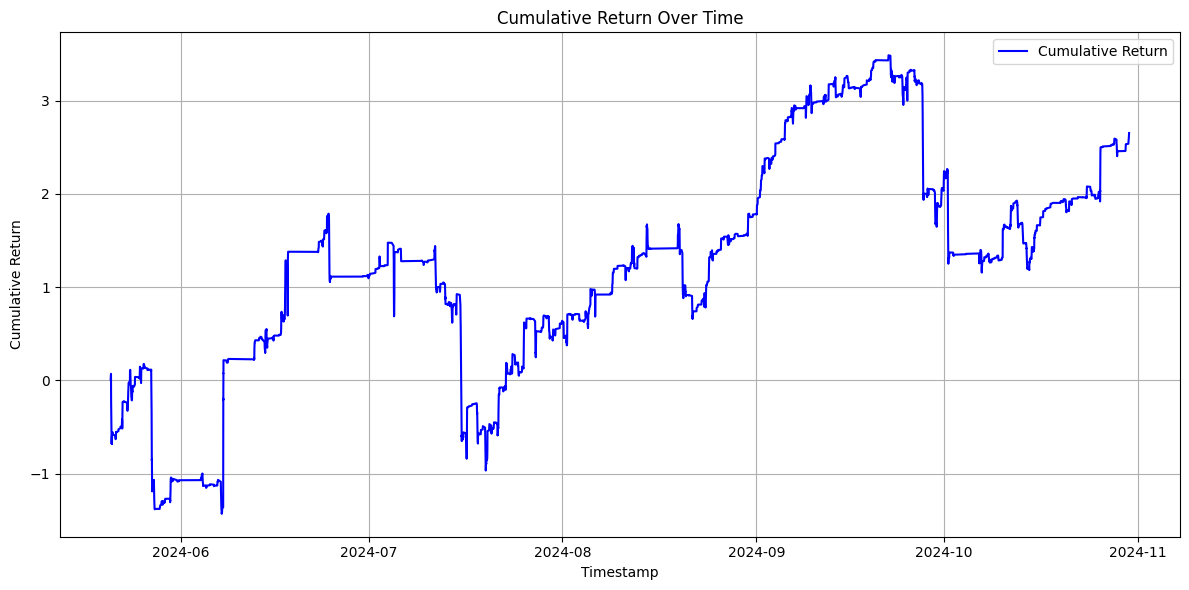

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 确保 timestamp 为 datetime 类型
result_df['timestamp'] = pd.to_datetime(result_df['timestamp'])

# 将列表类型的 beta 和 return_5steps 转换为 float
result_df['beta'] = result_df['beta'].apply(lambda x: x[0] if isinstance(x, list) else x)
result_df['return_5steps'] = result_df['return_5steps'].apply(lambda x: x[0] if isinstance(x, list) else x)

# 按时间排序
result_df = result_df.sort_values('timestamp')

# 计算累计收益
result_df['cumulative_return'] = result_df['return_5steps'].cumsum()

# ---------- 📈 图一：总累计收益 ----------
plt.figure(figsize=(12, 6))
plt.plot(result_df['timestamp'], result_df['cumulative_return'], label='Cumulative Return', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


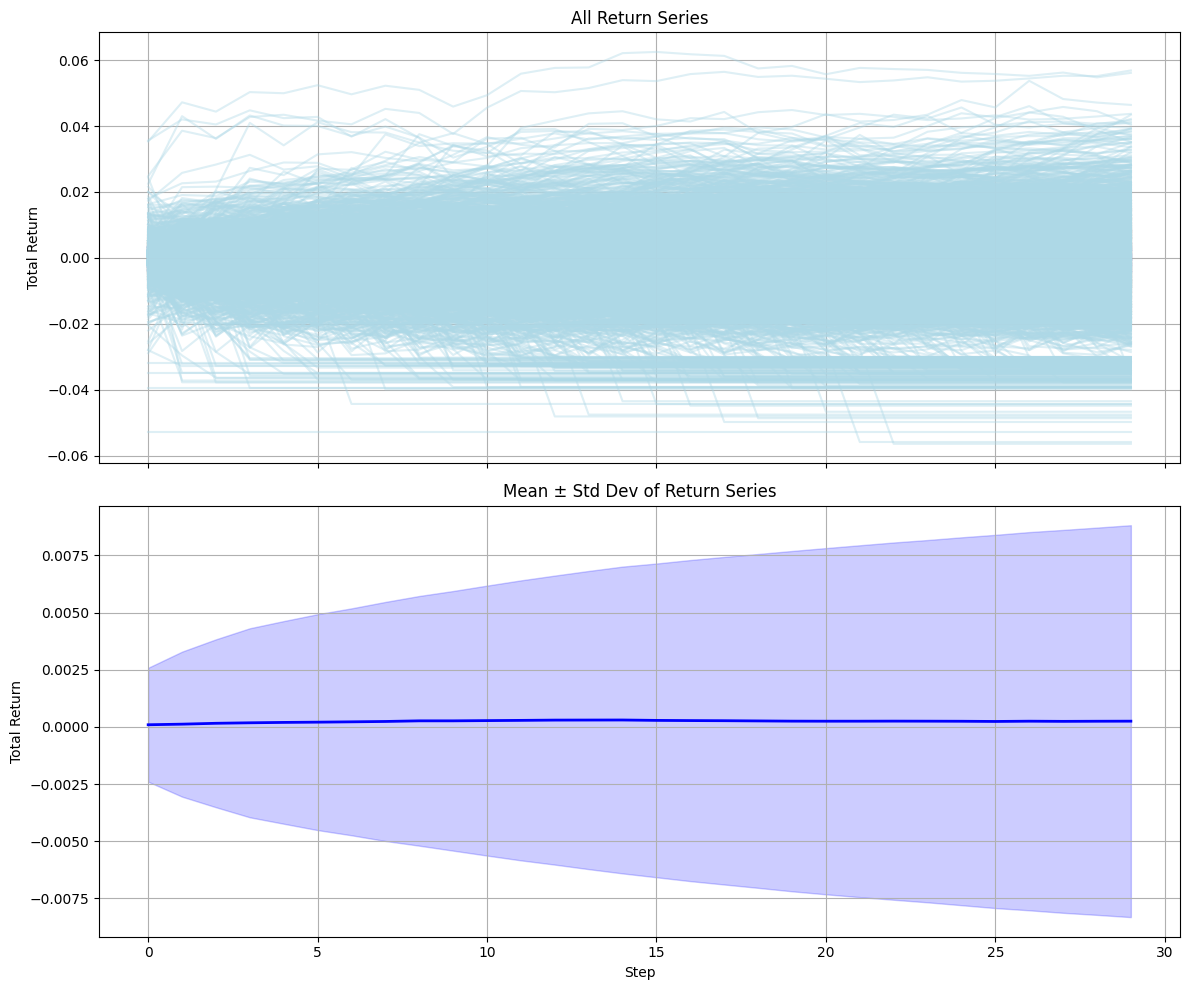

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 result_list 中每个 item 的 "return_series" 长度相同
all_series = np.array([item["return_series"] for item in result_list])  # shape: (num_samples, hold_time)
mean_series = np.mean(all_series, axis=0).flatten()  # 每个时间点的均值
std_series = np.std(all_series, axis=0).flatten()    # 每个时间点的标准差

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# --- 第一张图：所有的 return_series 曲线 ---
for series in all_series:
    axs[0].plot(series, color='lightblue', alpha=0.4)

axs[0].set_title("All Return Series")
axs[0].set_ylabel("Total Return")
axs[0].grid(True)

# --- 第二张图：均值和 ±1 标准差 ---
axs[1].plot(mean_series, color='blue', linewidth=2, label='Mean')
axs[1].fill_between(range(len(mean_series)),
                    mean_series - std_series,
                    mean_series + std_series,
                    color='blue',
                    alpha=0.2,
                    label='±1 Std Dev')

axs[1].set_title("Mean ± Std Dev of Return Series")
axs[1].set_xlabel("Step")
axs[1].set_ylabel("Total Return")
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [20]:
all_series.shape

(10607, 30, 1)

In [21]:
result_df.groupby('coin').mean()

,timestamp,beta,BTC_price,coin_price,position,return_series,return_5steps,cumulative_return
coin,,,,,,,,
AAVE,2024-08-05 10:35:35.673352192,[0.7608357287862372],0.959694,1.359455,0.220630,"[[-2.4495960817483957e-05], [-0.00013901518894...",[-0.0018486220487143863],[1.222807273101757]
ADA,2024-08-08 02:30:41.503759360,[1.1293124104887682],0.962275,0.848686,-0.320301,"[[4.268017869454711e-05], [3.5309302803078446e...",[5.697826218713471e-05],[0.9556037299407029]
AVAX,2024-08-13 06:04:40.761522944,[1.2248588232114161],0.958910,0.797808,0.170341,"[[0.0001184545778293646], [0.00013533614748429...",[0.0011682925306049708],[1.135463615194323]
BONK,2024-08-13 12:38:35.409836032,[1.083813798622731],0.965902,0.942655,-0.006557,"[[0.00020962757936771853], [0.0003691414257114...",[0.00011425179399485794],[1.2295587199130171]
DOGE,2024-08-02 18:24:21.290322432,[1.2231107378330008],0.965553,0.808302,0.135484,"[[0.00014772738762535415], [0.0002737696290118...",[0.0014380957693037647],[0.9814717015763783]
ETH,2024-08-25 01:44:40.995474944,[1.0208144373088603],0.941251,0.933688,-0.239819,"[[3.818119665247245e-05], [-1.0827468571375624...",[0.0007844583632181481],[1.5527931200303449]
LINK,2024-08-10 13:55:02.759526912,[1.0497674220429387],0.959449,0.928957,-0.190539,"[[7.320016575159828e-06], [-3.7335405994617836...",[-0.001319805273432286],[1.017374805056776]
NOT,2024-08-16 03:42:44.127424000,[1.0074684257681032],0.963769,1.097021,0.116343,"[[-1.443629069267118e-05], [-4.417342205153997...",[-0.0012030967915139608],[1.2438906465045183]
PEPE,2024-08-18 10:25:46.251768064,[1.049945677478905],0.949689,0.942812,0.086280,"[[0.0001895582444520394], [0.00021150843210049...",[0.001327543610735139],[1.2975231446237017]


In [22]:
df_resid

,PEPE,AVAX,DOGE,WIF,BONK,ADA,SUI,SHIB,XLM,XRP,TRX,SOL,LINK,NOT,AAVE,ETH
timestamp,,,,,,,,,,,,,,,,
2024-05-17 16:10:00,[-0.0019928133336541975],[-0.06517940095163133],[-0.00868846802956691],[-0.006909802368671114],[0.00821070154863146],[-0.05104019251886016],[-0.02247167371230341],[-0.0038918327222758897],[-0.018549716734257204],[-0.006857289692204338],[0.016657329249942787],[-0.0354283654687646],[-0.15500657751159008],[0.24508552445207166],[-0.03086197343396946],NaN
2024-05-17 16:15:00,[-0.008297834227025236],[-0.06507365579601654],[-0.007049398598786061],[-0.011604431311373009],[-0.0009333889404088413],[-0.047165394075797895],[-0.021036676596359438],[-0.0056397787561071056],[-0.01677643252500105],[-0.0050854707907206365],[0.017878294232391734],[-0.04655275166472661],[-0.15401642987576047],[0.2441431908060352],[-0.028953677204089923],NaN
2024-05-17 16:20:00,[-0.008943855415052493],[-0.06491294169246076],[-0.008609369783644238],[-0.010158082548069158],[-0.0034042060170684785],[-0.045865104290279124],[-0.020426133451704853],[-0.005582602890176203],[-0.016153595692908418],[-0.0051847839306293775],[0.01914221448423925],[-0.04419707933352335],[-0.15353958850125604],[0.2425016403676611],[-0.027885272999576438],NaN
2024-05-17 16:25:00,[-0.00663422412396808],[-0.0644771323363329],[-0.008050614299677461],[-0.023530513169312872],[-0.01242141944993036],[-0.04547507848288057],[-0.023565130254730615],[-0.004420461231914752],[-0.013681317049117236],[-0.002252426118696693],[0.019716763936869608],[-0.04046070484487396],[-0.15571411016382397],[0.23107739090218404],[-0.027332850914214113],NaN
2024-05-17 16:30:00,[-0.001771468600341608],[-0.061895881071258874],[-0.005160818248173049],[-0.014999527260795897],[-0.008040611424478872],[-0.04463272499763704],[-0.025345899563332885],[-0.0014347586648442157],[-0.012523119851841402],[-0.0017183794929556129],[0.019166799951276348],[-0.03824789330690748],[-0.16234323271464213],[0.20325422303123852],[-0.025651447204507516],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 09:05:00,[0.004719001362212483],[0.028483072057696734],[0.025107673354505033],[0.021777912146474065],[0.06342435205158536],[0.008011610478678266],[0.014378138956543607],[0.02359354990266138],[0.030875657143827784],[0.011254222331342323],[-0.01378469684944661],[0.027016234770820935],[-0.012369695566215588],[0.03632360585389849],[0.004304932011663265],[0.007954120534508613]
2024-10-31 09:10:00,[0.002959132985826285],[0.02789314736302506],[0.023872719628786232],[0.02046808452136384],[0.06272850002804709],[0.007534263316261169],[0.012113684597594432],[0.023912579787000343],[0.031557178741403735],[0.01100564061839937],[-0.015278412028981503],[0.02640477973780242],[-0.012782086636806023],[0.0351375655602193],[0.004966455895877742],[0.007256266416822532]
2024-10-31 09:15:00,[0.005027135154155982],[0.028085111416072284],[0.022800855071544612],[0.022465351205008144],[0.0633883815375087],[0.007721460359384258],[0.010726974469511097],[0.024034081764255255],[0.03263097218103961],[0.010504833421905113],[-0.015094020124763796],[0.02727755990910663],[-0.011936741924684968],[0.03661825847504585],[0.004927626286856945],[0.007835551500019244]


In [23]:
# import pandas as pd
# import numpy as np

# # 假设 df_resid 已经是你提供的 dataframe，并且里面的值是 list 类型（每个元素是一维 list）

# # 第一步：把每个 cell 里的 list 提取为浮点数（去掉外层中括号）
# df_float = df_resid.applymap(lambda x: x[0] if isinstance(x, list) else x)

# # 设置窗口大小
# window_size = 288*3
# n = len(df_float)

# # 用于存储结果
# avg_corr_list = []

# # 滚动窗口
# for start in range(0, n - window_size + 1):
#     window_df = df_float.iloc[start:start + window_size]
    
#     # 计算相关性矩阵
#     corr_matrix = window_df.corr()
    
#     # 只取非对角线元素，求平均
#     upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#     mean_corr = upper_triangle.stack().mean()
    
#     avg_corr_list.append(mean_corr)

# # 结果放入 DataFrame 或 Series 中
# avg_corr_series = pd.Series(avg_corr_list)

# # 打印前几项看看
# print(avg_corr_series.head())


In [24]:
# import matplotlib.pyplot as plt

# # 时间戳与 avg_corr_series 对齐（每个窗口用其结束时间）
# timestamps = df_float.index[window_size - 1:]  # 从第 288 行开始的时间戳

# # 创建带索引的 Series
# avg_corr_series.index = timestamps

# # 作图
# plt.figure(figsize=(14, 6))
# plt.plot(avg_corr_series, label='Avg Pairwise Correlation (288 window)', color='steelblue')
# plt.title('Rolling Average Pairwise Correlation (288-row window)', fontsize=14)
# plt.xlabel('Time')
# plt.ylabel('Correlation')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()


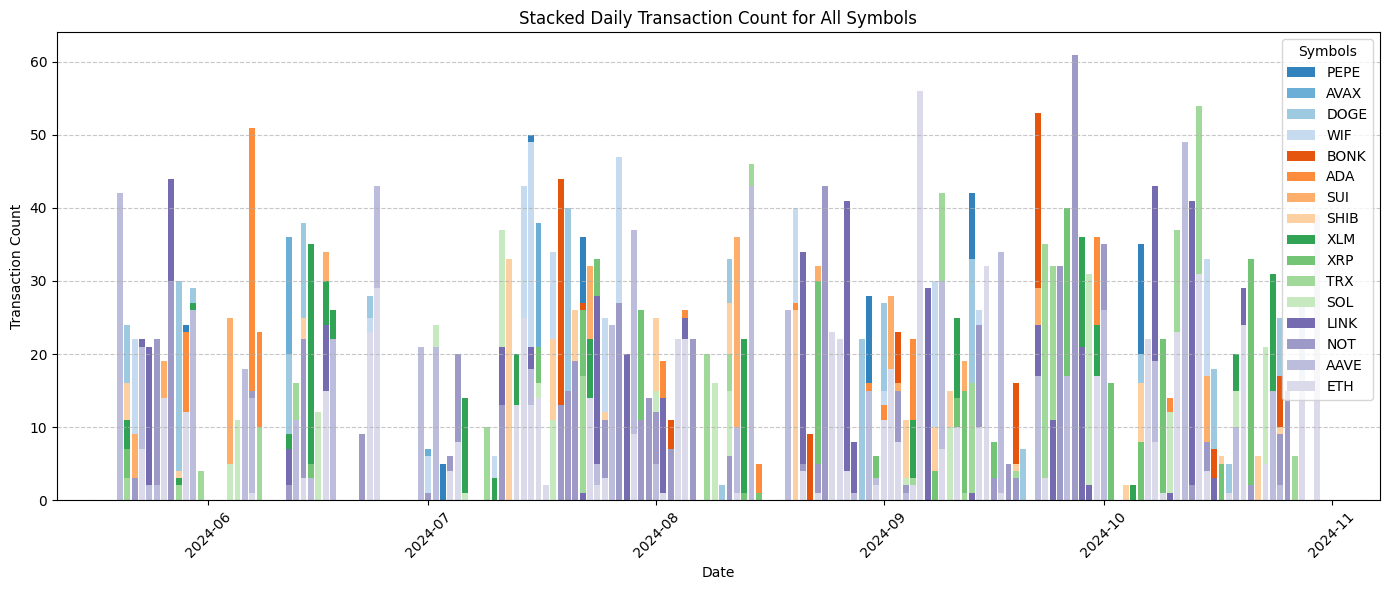

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个图形
plt.figure(figsize=(14, 6))

# 设置颜色池，这里为示例使用了 matplotlib 自带的颜色
colors = plt.cm.tab20c.colors  # 可以选择不同的颜色地图，这里用的是 tab20c

# 获取所有 symbol 的每日交易量统计数据
daily_counts_dict = {}

for symbol in residuals_positive_dict.keys():
    # 提取每个 symbol 的时间戳数据
    data = residuals_positive_dict[symbol]
    
    # 提取时间戳并转成 DataFrame
    timestamps = [item[0] for item in data]
    df = pd.DataFrame({'timestamp': timestamps})
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    # 按天统计频次
    df['date'] = df['timestamp'].dt.date
    
    # 创建完整的日期范围，从最小日期到最大日期
    date_range = pd.date_range(df['date'].min(), df['date'].max(), freq='D')
    
    # 计算每天的交易量（频次），并确保所有日期都有显示
    daily_counts = df['date'].value_counts().reindex(date_range.date, fill_value=0)
    
    # 将结果保存到字典中
    daily_counts_dict[symbol] = daily_counts

# 获取所有日期（时间戳）
all_dates = sorted(set(date for counts in daily_counts_dict.values() for date in counts.index))

# 设置柱状图的底部
bottoms = {symbol: [0] * len(all_dates) for symbol in daily_counts_dict.keys()}

# 叠加每个 symbol 的交易量
for idx, (symbol, daily_counts) in enumerate(daily_counts_dict.items()):
    # 获取每个日期的交易量
    counts = daily_counts.reindex(all_dates, fill_value=0).values
    
    # 绘制叠加的柱状图
    plt.bar(all_dates, counts, label=symbol, color=colors[idx % len(colors)], bottom=bottoms[symbol])
    
    # 更新底部位置
    for i in range(len(all_dates)):
        bottoms[symbol][i] += counts[i]

# 图形设置
plt.title('Stacked Daily Transaction Count for All Symbols')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.legend(title='Symbols')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [37]:
#13:12
from datetime import datetime

now = datetime.now()
print(now)



2025-04-18 13:31:00.974404
